In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

from scipy.cluster.vq import kmeans, vq
from scipy.spatial.distance import cdist
import time

from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')

import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jeffreyhuang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jeffreyhuang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jeffreyhuang/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jeffreyhuang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeffreyhuang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Pre-Processing and Basic EDA

### Basic Information

In [2]:
df = pd.read_csv('data/tiktok.csv')
print(df.shape)
df.head(5)

(19382, 12)


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries are already happening and will become common by 2025,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more microorganisms in one teaspoon of soil than people on the planet,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,"someone shared with me that american industrialist andrew carnegie had a net worth of $475 million usd, worth over $300 billion usd today",not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,"someone shared with me that the metro of st. petersburg, with an average depth of hundred meters, is the deepest metro in the world",not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of businesses allowing employees to bring pets to the workplace has grown by 6% worldwide,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [3]:
# Basic EDA - stats
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [4]:
# Basic EDA - Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


### Data Cleaning

#### Missing Value Imputation

In [5]:
# Missing Value Detection
missing_values = df.isnull().sum()
print("Missing values for each column:")
print(missing_values)
print()

Missing values for each column:
#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64



In [6]:
# Missing Value Deletion
df = df[:-298]
missing_values = df.isnull().sum()
print("Missing values for each column:")
print(missing_values)
print(df.shape)
df.tail(5)

Missing values for each column:
#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64
(19084, 12)


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
19079,19080,opinion,1492320297,49,in our opinion the earth holds about 11 quintillion pounds of air,not verified,active,6067.0,423.0,81.0,8.0,2.0
19080,19081,opinion,9841347807,23,in our opinion the queens in ant colonies live for around 30 years,not verified,active,2973.0,820.0,70.0,3.0,0.0
19081,19082,opinion,8024379946,50,in our opinion the moon is moving away from the earth,not verified,active,734.0,102.0,7.0,2.0,1.0
19082,19083,opinion,7425795014,8,in our opinion lightning strikes somewhere on earth about 100 times every second,not verified,active,3394.0,655.0,123.0,11.0,4.0
19083,19084,opinion,4094655375,58,in our opinion a pineapple plant can only produce one pineapple a year,not verified,active,5034.0,815.0,281.0,11.0,1.0


#### Duplicate Value Detection

In [7]:
# Check for duplicates
df.duplicated().sum()

0

## Classify Claim/Opinion

### Data Preparation / Basic Feature Selection

In [11]:
df_num = df.drop(["#", "video_id", "video_transcription_text"], axis=1)
print("Numeric Data Set")
print(df_num.shape)
df_num.head(5)

Numeric Data Set
(19084, 9)


,claim_status,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,59,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,32,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,31,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,25,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,19,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


### Pair plots

In [322]:
## Pair Plots
palette = {'opinion': '#10BFBF', 'claim': '#EE1D52'}
numeric_columns = [col for col in df_num.columns if (df_num[col].nunique() > 2) and (np.issubdtype(df_num[col].dtype, np.number))]
sns.pairplot(df_num[numeric_columns + ['claim_status']], hue='claim_status', palette=palette)
plt.suptitle('Pairplot of Numeric Features', size=18, fontweight="bold")
plt.savefig('chart/pairplot.png')
plt.close()

### Categorical Data Analysis

In [323]:
print("Column 'claim_status' unique value:", df_num["claim_status"].unique())
print("Column 'verified_status' unique value:", df_num["verified_status"].unique())
print("Column 'author_ban_status' unique value:", df_num["author_ban_status"].unique())

Column 'claim_status' unique value: ['claim' 'opinion']
Column 'verified_status' unique value: ['not verified' 'verified']
Column 'author_ban_status' unique value: ['under review' 'active' 'banned']


In [324]:
# Pie chart for categorical data
def plot_pie(ax, column, df):
    value_counts = df[column].value_counts()
    labels = value_counts.index
    sizes = value_counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 24}, colors=['#10BFBF', '#EE1D52', '#598B8E'], explode=[0.05]*len(labels))
    ax.set_title(f'{column}', fontsize=36)

In [325]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
plt.title("Pie Chart for Categorical Data")
plot_pie(axs[0], 'claim_status', df=df)
plot_pie(axs[1], 'verified_status', df=df)
plot_pie(axs[2], 'author_ban_status',df=df)
plt.tight_layout()
plt.savefig('chart/pie_chart.png')
plt.close()

In [326]:
# Pie chart for claim data
df_claim = df_num[df_num['claim_status'] == "claim"]
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
plt.title("Pie Chart for Categorical Data")
plot_pie(axs[0], 'claim_status', df=df_claim)
plot_pie(axs[1], 'verified_status', df=df_claim)
plot_pie(axs[2], 'author_ban_status', df=df_claim)
plt.tight_layout()
plt.savefig('chart/pie_chart_claim.png')
plt.close()

In [327]:
# Pie chart for opinion data
df_opinion = df_num[df_num['claim_status'] == "opinion"]
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
plt.title("Pie Chart for Categorical Data")
plot_pie(axs[0], 'claim_status', df=df_opinion)
plot_pie(axs[1], 'verified_status', df=df_opinion)
plot_pie(axs[2], 'author_ban_status', df=df_opinion)
plt.tight_layout()
plt.savefig('chart/pie_chart_opinion.png')
plt.close()

In [328]:
crosstab_verified = pd.crosstab(df['claim_status'], df['verified_status'])
print(crosstab_verified)

verified_status  not verified  verified
claim_status                           
claim                    9399       209
opinion                  8485       991


In [329]:
crosstab_verified = pd.crosstab(df['claim_status'], df['author_ban_status'])
print(crosstab_verified)

author_ban_status  active  banned  under review
claim_status                                   
claim                6566    1439          1603
opinion              8817     196           463


### Categorical Data Encoding

In [12]:
# Transfer all categorical columns into numeric
## Convert binary categorical columns to 0 and 1
df_num['claim_status'] = df_num['claim_status'].map({'opinion': 0, 'claim': 1})
df_num['verified_status'] = df_num['verified_status'].map({'not verified': 0, 'verified': 1})

## Convert trinary categorical columns to 0 and 1 using one-hot encoder
one_hot = pd.get_dummies(df_num['author_ban_status'], prefix='author')
df_num = df_num.drop('author_ban_status', axis=1)
df_num = pd.concat([df_num, one_hot], axis=1)

df_num[['author_active', 'author_banned', 'author_under review']] = df_num[
    ['author_active', 'author_banned', 'author_under review']].astype(int)

In [13]:
print("Updated DataFrame:")
print(df_num.shape)
print(df_num.head(5))

Updated DataFrame:
(19084, 11)
   claim_status  video_duration_sec  verified_status  video_view_count  \
0             1                  59                0          343296.0   
1             1                  32                0          140877.0   
2             1                  31                0          902185.0   
3             1                  25                0          437506.0   
4             1                  19                0           56167.0   

   video_like_count  video_share_count  video_download_count  \
0           19425.0              241.0                   1.0   
1           77355.0            19034.0                1161.0   
2           97690.0             2858.0                 833.0   
3          239954.0            34812.0                1234.0   
4           34987.0             4110.0                 547.0   

   video_comment_count  author_active  author_banned  author_under review  
0                  0.0              0              0           

In [332]:
# Calculate the number and the percentage of rows
count_zeros = sum(df_num['claim_status'] == 0)
count_ones = sum(df_num['claim_status'] == 1)
print(f"The number of rows where claim_status is 'opinion': {count_zeros} which is {round(100*count_zeros/df_num.shape[0],2)}%")
print(f"The number of rows where claim_status is 'claim': {count_ones} which is {round(100*count_ones/df_num.shape[0],2)}%")
print()

The number of rows where claim_status is 'opinion': 9476 which is 49.65%
The number of rows where claim_status is 'claim': 9608 which is 50.35%



In [333]:
count_zeros = sum(df_num['verified_status'] == 0)
count_ones = sum(df_num['verified_status'] == 1)
print(f"The number of rows where verified_status is 'not verified': {count_zeros} which is {round(100*count_zeros/df_num.shape[0],2)}%")
print(f"The number of rows where verified_status is 'verified': {count_ones} which is {round(100*count_ones/df_num.shape[0],2)}%")
print()

The number of rows where verified_status is 'not verified': 17884 which is 93.71%
The number of rows where verified_status is 'verified': 1200 which is 6.29%



In [334]:
count_active = sum(df_num['author_active'] == 1)
count_banned = sum(df_num['author_banned'] == 1)
count_under_review = sum(df_num['author_under review'] == 1)
print(f"The number of rows where author is 'active': {count_active} which is {round(100*count_active/df_num.shape[0],2)}%")
print(f"The number of rows where author is 'banned': {count_banned} which is {round(100*count_banned/df_num.shape[0],2)}%")
print(f"The number of rows where author is 'under review': {count_under_review} which is {round(100*count_under_review/df_num.shape[0],2)}%")
print()

The number of rows where author is 'active': 15383 which is 80.61%
The number of rows where author is 'banned': 1635 which is 8.57%
The number of rows where author is 'under review': 2066 which is 10.83%



In [335]:
## Distribution of Each Attribute
numeric_columns = [col for col in df_num.columns if (df_num[col].nunique() > 2) and (np.issubdtype(df_num[col].dtype, np.number))]
plt.figure(figsize=(20, 10))
for index, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, index)
    plt.hist(df_num[column], bins=40, color="#10BFBF")
    plt.title(column)
    plt.grid(True)
plt.tight_layout()
plt.savefig('chart/histogram.png')
plt.close()

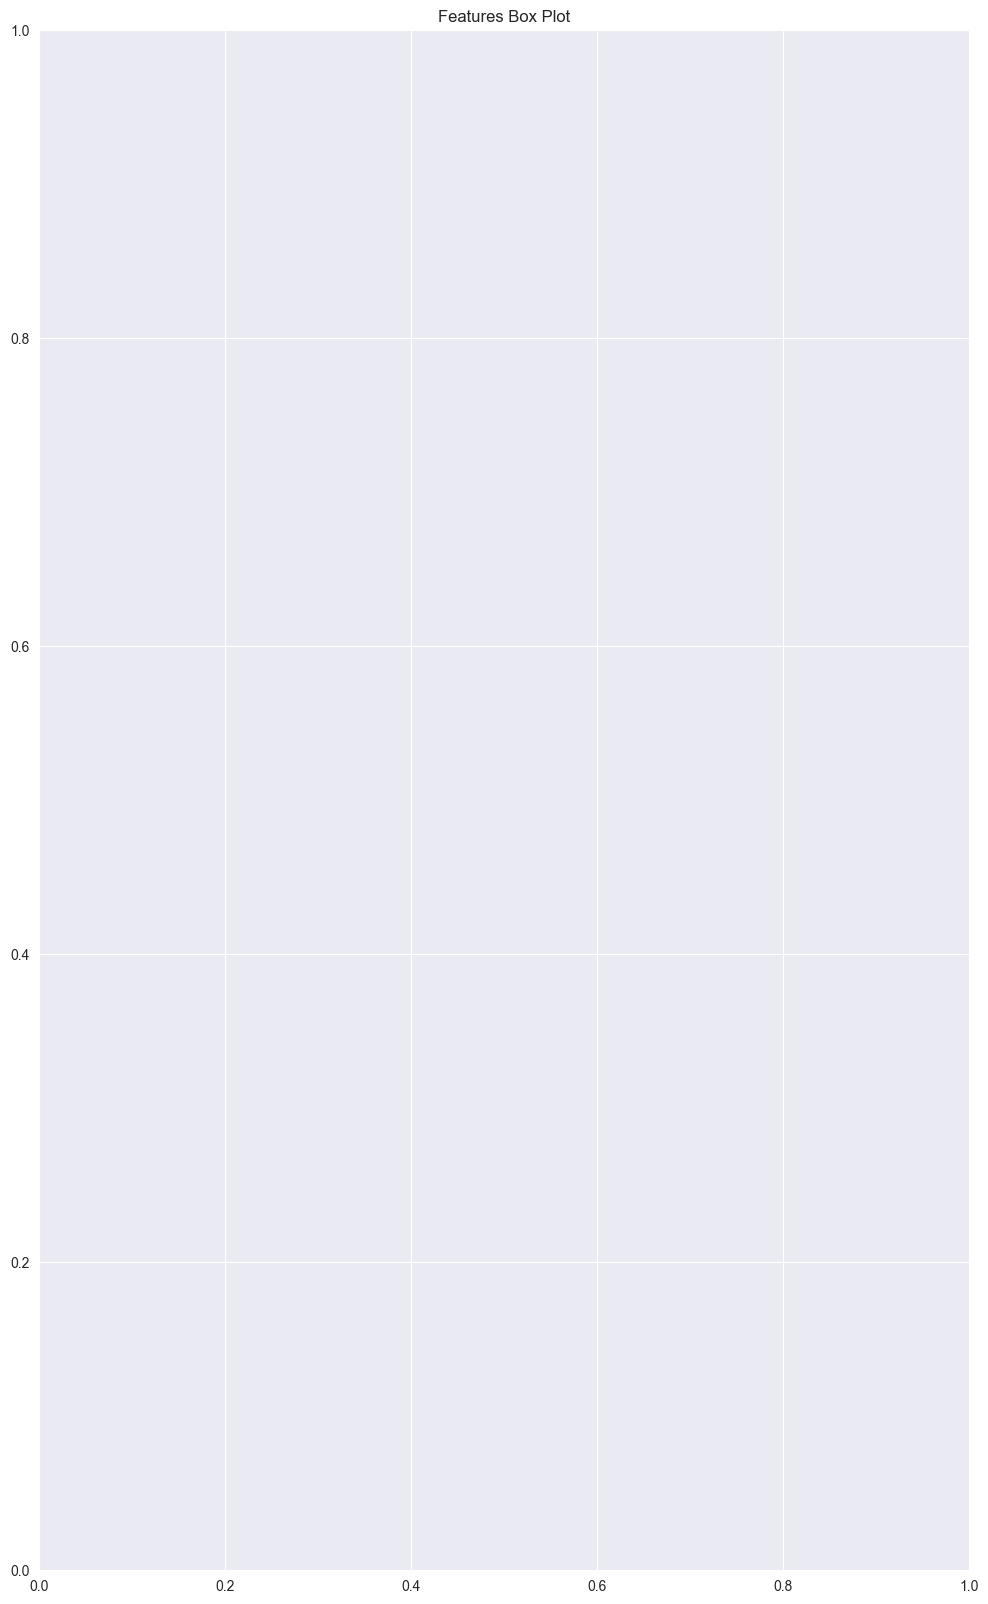

In [336]:
## Box Plot part 1
numeric_columns = [col for col in df_num.columns if (df_num[col].nunique() > 2) and (np.issubdtype(df_num[col].dtype, np.number))]
plt.figure(figsize=(12, 20))
plt.title("Features Box Plot")
df_num[numeric_columns].plot(kind='box', subplots=True, layout=(2, 3), sharex=False, sharey=False, grid=True, color="#10BFBF", figsize=(20, 10))
plt.tight_layout()
plt.suptitle('Features Box Plot', size=18, fontweight="bold", y=1.02)
plt.savefig('chart/boxplot.png')
plt.close()

In [14]:
## Standardize the data
numeric_columns = [col for col in df_num.columns if (df_num[col].nunique() > 2) and (np.issubdtype(df_num[col].dtype, np.number))]
scaler = StandardScaler()
df_num.loc[:, numeric_columns] = scaler.fit_transform(df_num[numeric_columns])
print("DataFrame after standardization:")
print(df_num.head())

DataFrame after standardization:
   claim_status  video_duration_sec  verified_status  video_view_count  \
0             1            1.637872                0          0.274362   
1             1           -0.026119                0         -0.352545   
2             1           -0.087748                0          2.005286   
3             1           -0.457524                0          0.566138   
4             1           -0.827300                0         -0.614899   

   video_like_count  video_share_count  video_download_count  \
0         -0.486292          -0.514877             -0.523104   
1         -0.052090           0.071757              0.055667   
2          0.100327          -0.433186             -0.107985   
3          1.166638           0.564275              0.092090   
4         -0.369650          -0.394104             -0.250682   

   video_comment_count  author_active  author_banned  author_under review  
0            -0.436849              0              0         

In [338]:
## Box Plot part 2
plt.figure(figsize=(20, 10))
df_num[numeric_columns].boxplot()
plt.title('Continuous Numerical Features Box Plot after Standardization', size=24, fontweight="bold")
plt.xticks(rotation=30)
plt.ylabel("value", size=18)
plt.savefig('chart/boxplots.png')
plt.close()

In [339]:
# KDE for All Features
fig, axs = plt.subplots(2, 3, figsize=(20, 10), sharey=True)
axs = axs.flatten()
for i, column in enumerate(numeric_columns):
    sns.kdeplot(df_num[column], fill=True, ax=axs[i],color="#10BFBF")
    axs[i].set_title(f"PDF of {column}")
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Density")
    axs[i].grid(True)
plt.tight_layout(pad=2.0)
plt.savefig('chart/kde.png')
plt.close()

In [340]:
# KDE for All Features in claim label
df_claim = df_num[df_num['claim_status'] == 1]
fig, axs = plt.subplots(2, 3, figsize=(20, 10), sharey=True)
axs = axs.flatten()
for i, column in enumerate(numeric_columns):
    sns.kdeplot(data=df_claim, x=column, label='claim', fill=True, color="#EE1D52", ax=axs[i])
    axs[i].set_title(f"PDF of {column}")
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Density")
    axs[i].grid(True)
    axs[i].legend()
plt.tight_layout(pad=2.0)
plt.savefig('chart/kde_claim.png')
plt.close()

In [341]:
# KDE for All Features in opinion label
df_opinion = df_num[df_num['claim_status'] == 0]
fig, axs = plt.subplots(2, 3, figsize=(20, 10), sharey=True)
axs = axs.flatten()
for i, column in enumerate(numeric_columns):
    sns.kdeplot(data=df_opinion, x=column, label='opinion', fill=True, color="#598B8E", ax=axs[i])
    axs[i].set_title(f"PDF of {column}")
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Density")
    axs[i].grid(True)
    axs[i].legend()
plt.tight_layout(pad=2.0)
plt.savefig('chart/kde_opinion.png')
plt.close()

In [342]:
## Correlation
plt.figure(figsize=(18, 14))
sns.heatmap(df_num.corr(), annot=False, linewidths=0.03, cmap='coolwarm')
plt.title('Correlation Heatmap', size=18, fontweight="bold")
plt.savefig('chart/heatmap.png')
plt.close()

corr_matrix = df_num.corr()
print(corr_matrix['claim_status'].sort_values(ascending=False))
print()

claim_status            1.000000
video_view_count        0.768170
video_like_count        0.619399
video_download_count    0.513217
video_share_count       0.512067
video_comment_count     0.430487
author_banned           0.230605
author_under review     0.189853
video_duration_sec      0.003914
verified_status        -0.170600
author_active          -0.312438
Name: claim_status, dtype: float64



### Modeling Training

#### One Split Data

In [220]:
# Training
results = []
X = df_num.drop(['claim_status'], axis=1)
y = df_num['claim_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(15267, 10)

#### Random Forest

In [221]:
print("Random Forest")
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [2, 4, 8, 16]
}
# Best Record
param_grid = { 'n_estimators': [200], 'max_depth': [None], 'min_samples_split': [2], 'min_samples_leaf': [2]}

grid = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, verbose=2)
grid.fit(X_train, y_train)
best_rf = grid.best_estimator_
print(f"Best hyperparameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")
results.append(('Random Forest', grid.best_params_, grid.best_score_))

Random Forest
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.0s
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.9953495021698091


In [222]:
best_rf = grid.best_estimator_
importances = best_rf.feature_importances_
feature_names = X_train.columns.tolist()
print("Feature Importance:")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

indices = range(len(importances))
plt.figure(figsize=(10, 8))  # Set a larger figure size
plt.title("Feature Importance")
bars = plt.bar(indices, importances, color="r", align="center")
plt.xticks(indices, feature_names, rotation=90)
plt.xlim([-1, len(importances)])

# Place the text above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 4), ha='center', va='bottom')

plt.tight_layout(pad=1.0)  # Adjust the padding
plt.savefig("chart/feature_importance.png", bbox_inches='tight')
plt.close()

Feature Importance:
video_duration_sec: 0.0015
verified_status: 0.0001
video_view_count: 0.3892
video_like_count: 0.2156
video_share_count: 0.1739
video_download_count: 0.1330
video_comment_count: 0.0786
author_active: 0.0066
author_banned: 0.0012
author_under review: 0.0003


#### Gradient Boosting

In [223]:
print("Gradient Boosting")
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.005, 0.01, 0.05],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4, 8]
}
# Second Record
param_grid = {'n_estimators': [100], 'learning_rate':  [0.01], 'min_samples_split': [2], 'min_samples_leaf': [8]}
# Best Record
param_grid = {'n_estimators': [200], 'learning_rate':  [0.05], 'min_samples_split': [2], 'min_samples_leaf': [8]}
grid = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                       param_grid=param_grid,
                       cv=5,
                       verbose=2,
                       n_jobs=-1)  # n_jobs=-1 will use all available CPU cores
grid.fit(X_train, y_train)
best_gb = grid.best_estimator_
print(f"Best hyperparameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")
results.append(('Gradient Boosting', grid.best_params_, grid.best_score_))

Gradient Boosting
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

Best hyperparameters: {'learning_rate': 0.05, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.9954805208399696


#### KNN

In [224]:
print("K-Nearest Neighbors")
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] # 1 for Manhattan distance, 2 for Euclidean distance
}
# Best Record
param_grid_knn = { 'n_neighbors': [3], 'weights': ['uniform' ], 'p': [2]}

grid_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid=param_grid_knn,
                        cv=5,
                        verbose=2,
                        n_jobs=-1)

grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
print(f"Best hyperparameters: {grid_knn.best_params_}")
print(f"Best score: {grid_knn.best_score_}")
results.append(('K-Nearest Neighbors', grid_knn.best_params_, grid_knn.best_score_))

K-Nearest Neighbors
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future

Best hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Best score: 0.9852624588394809


/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

#### Linear Discriminant Analysis

In [225]:
# Linear Discriminant Analysis
print("Linear Discriminant Analysis")
best_lda = LinearDiscriminantAnalysis()
best_lda.fit(X_train, y_train)
lda_train_score = best_lda.score(X_train, y_train)
print(f"Train score: {lda_train_score}")
results.append(('Linear Discriminant Analysis', 'N/A', lda_train_score))

Linear Discriminant Analysis
Train score: 0.8814436366018209


#### Logistic Regression

In [226]:
# Logistic Regression
print("Logistic Regression")
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
# Best Record
param_grid_lr = {'C': [100], 'solver': ['newton-cg']}
grid_lr = GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
                       param_grid=param_grid_lr,
                       cv=5,
                       verbose=2,
                       n_jobs=-1)

grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_
print(f"Best hyperparameters: {grid_lr.best_params_}")
print(f"Best score: {grid_lr.best_score_}")
results.append(('Logistic Regression', grid_lr.best_params_, grid_lr.best_score_))

/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Logistic Regression
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

Best hyperparameters: {'C': 100, 'solver': 'newton-cg'}
Best score: 0.9914849662082086


#### Decision Tree

In [227]:
print("Decision Tree")
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10]
}
# Best Record
param_grid_dt = {'max_depth': [10], 'min_samples_split': [2],'min_samples_leaf': [1]}
grid_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                       param_grid=param_grid_dt,
                       cv=5,
                       verbose=2,
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_
print(f"Best hyperparameters: {grid_dt.best_params_}")
print(f"Best score: {grid_dt.best_score_}")
results.append(('Decision Tree', grid_dt.best_params_, grid_dt.best_score_))

Decision Tree
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9950220198454245


/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future

### Modeling Testing

In [233]:
# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Accuracy Train', 'Accuracy Test', 'Precision', 'Recall', 'F1 Score', 'AUC'])

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Training the model
    model.fit(X_train, y_train)

    # Predictions on training set
    train_predictions = model.predict(X_train)
    acc_train = accuracy_score(y_train, train_predictions)

    # Predictions on testing set
    test_predictions = model.predict(X_test)
    acc_test = accuracy_score(y_test, test_predictions)

    # Calculating other evaluation metrics on test set
    precision = precision_score(y_test, test_predictions)
    recall = recall_score(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions)

    # Probabilities and ROC-AUC for test set only
    probabilities = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    roc_auc = auc(fpr, tpr)

    # Record the results
    results_df.loc[len(results_df)] = [model_name, round(acc_train, 4), round(acc_test, 4), round(precision, 4), round(recall, 4), round(f1, 4), round(roc_auc, 4)]

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.savefig("chart/"+model_name)
    plt.close()

# Evaluate each model
evaluate_model(best_rf, X_train, y_train, X_test, y_test, "Random Forest")
evaluate_model(best_gb, X_train, y_train, X_test, y_test, "Gradient Boosting")
evaluate_model(best_knn, X_train, y_train, X_test, y_test, "K-Nearest Neighbors")
evaluate_model(best_lda, X_train, y_train, X_test, y_test, "LDA")
evaluate_model(best_lr, X_train, y_train, X_test, y_test, "Logistic Regression")
evaluate_model(best_dt, X_train, y_train, X_test, y_test, "Decision Tree")

# Display final results DataFrame
print(results_df)

                 Model  Accuracy Train  Accuracy Test  Precision  Recall  \
0        Random Forest          0.9960         0.9953     1.0000  0.9907   
1    Gradient Boosting          0.9963         0.9955     0.9995  0.9917   
2  K-Nearest Neighbors          0.9891         0.9882     0.9995  0.9772   
3                  LDA          0.8814         0.8866     1.0000  0.7754   
4  Logistic Regression          0.9916         0.9927     1.0000  0.9855   
5        Decision Tree          0.9967         0.9935     0.9958  0.9912   

   F1 Score     AUC  
0    0.9953  0.9982  
1    0.9956  0.9984  
2    0.9882  0.9914  
3    0.8735  0.9880  
4    0.9927  0.9975  
5    0.9935  0.9930  


In [234]:
print(results_df)

                 Model  Accuracy Train  Accuracy Test  Precision  Recall  \
0        Random Forest          0.9960         0.9953     1.0000  0.9907   
1    Gradient Boosting          0.9963         0.9955     0.9995  0.9917   
2  K-Nearest Neighbors          0.9891         0.9882     0.9995  0.9772   
3                  LDA          0.8814         0.8866     1.0000  0.7754   
4  Logistic Regression          0.9916         0.9927     1.0000  0.9855   
5        Decision Tree          0.9967         0.9935     0.9958  0.9912   

   F1 Score     AUC  
0    0.9953  0.9982  
1    0.9956  0.9984  
2    0.9882  0.9914  
3    0.8735  0.9880  
4    0.9927  0.9975  
5    0.9935  0.9930  


In [229]:
print(results)

[('Random Forest', {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}, 0.9953495021698091), ('Gradient Boosting', {'learning_rate': 0.05, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 200}, 0.9954805208399696), ('K-Nearest Neighbors', {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}, 0.9852624588394809), ('Linear Discriminant Analysis', 'N/A', 0.8814436366018209), ('Logistic Regression', {'C': 100, 'solver': 'newton-cg'}, 0.9914849662082086), ('Decision Tree', {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}, 0.9950220198454245)]


In [232]:
# Plot
plt.figure(figsize=(12, 6))
for column in ['Accuracy Train', 'Accuracy Test']:
    plt.plot(results_df['Model'], results_df[column], marker='o', label=column)
plt.xticks(rotation=45)
plt.title("Model Performance")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig("chart/result.png")
plt.close()

## Clustering of Videos Based on Engagement Metrics

In [15]:
df_eng = df_num[['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']]
print(df_eng.shape)
print(df_eng.head(5))

(19084, 5)
   video_view_count  video_like_count  video_share_count  \
0          0.274362         -0.486292          -0.514877   
1         -0.352545         -0.052090           0.071757   
2          2.005286          0.100327          -0.433186   
3          0.566138          1.166638           0.564275   
4         -0.614899         -0.369650          -0.394104   

   video_download_count  video_comment_count  
0             -0.523104            -0.436849  
1              0.055667             0.418560  
2             -0.107985            -0.025402  
3              0.092090             0.293500  
4             -0.250682            -0.246758  


In [29]:
def custom_kmeans(data, num_clusters, distance='euclidean'):
    # Custom K-means to support different distance metrics
    centroids, _ = kmeans(data, num_clusters)
    if distance == 'manhattan':
        D = cdist(data, centroids, 'cityblock')
    else:  # default to euclidean
        D = cdist(data, centroids, 'euclidean')
    return np.sum(np.min(D, axis=1))

wcss_euclidean = []
wcss_manhattan = []
times_euclidean = []
times_manhattan = []

for i in range(1, 11):  # Testing for 1 to 10 clusters
    # Euclidean distance
    start_time = time.time()
    wcss_euclidean.append(custom_kmeans(df_eng, i))
    times_euclidean.append(time.time() - start_time)

    # Manhattan distance
    start_time = time.time()
    wcss_manhattan.append(custom_kmeans(df_eng, i, 'manhattan'))
    times_manhattan.append(time.time() - start_time)

# Plotting WCSS for Euclidean and Manhattan distances
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss_euclidean, label='Euclidean')
plt.plot(range(1, 11), wcss_manhattan, label='Manhattan')
plt.title('Elbow Method with Different Distance Metrics')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.savefig("chart/wcss.png")
plt.close()

# Plotting computational time
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), times_euclidean, label='Euclidean Time')
plt.plot(range(1, 11), times_manhattan, label='Manhattan Time')
plt.title('Computational Time with Different Distance Metrics')
plt.xlabel('Number of clusters')
plt.ylabel('Time (seconds)')
plt.legend()
plt.savefig("chart/time.png")
plt.close()

In [31]:
# Determining the best K (using Euclidean for this example, adjust as needed)
best_k = 3 # set this based on the elbow plot
centroids, _ = kmeans(df_eng, best_k)
df_centroids = pd.DataFrame(centroids, columns=df_eng.columns)
df_centroids['sum'] = df_centroids.sum(axis=1)
df_centroids_sorted = df_centroids.sort_values(by='sum')
print("Cluster centers:\n", df_centroids)

Cluster centers:
    video_view_count  video_like_count  video_share_count  \
0         -0.709496         -0.588670          -0.489082   
1          0.847649          0.256155           0.127238   
2          1.497532          1.947156           1.752613   

   video_download_count  video_comment_count       sum  
0             -0.491100            -0.412453 -2.690801  
1              0.071760             0.012175  1.314977  
2              1.848101             1.627928  8.673331  


In [32]:
df['cluster'] = vq(df_eng, centroids)[0]
print(df.head())

   # claim_status    video_id  video_duration_sec  \
0  1        claim  7017666017                  59   
1  2        claim  4014381136                  32   
2  3        claim  9859838091                  31   
3  4        claim  1866847991                  25   
4  5        claim  7105231098                  19   

                                                                                                                    video_transcription_text  \
0                                          someone shared with me that drone deliveries are already happening and will become common by 2025   
1                                someone shared with me that there are more microorganisms in one teaspoon of soil than people on the planet   
2  someone shared with me that american industrialist andrew carnegie had a net worth of $475 million usd, worth over $300 billion usd today   
3        someone shared with me that the metro of st. petersburg, with an average depth of hundred meters

In [33]:
cluster_names = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2'}
df['cluster'] = df['cluster'].map(cluster_names)

In [34]:
palette = {'Cluster 0': '#10BFBF', 'Cluster 1': '#FFD700', 'Cluster 2': '#EE1D52'} # Example colors
sns.pairplot(df[['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count', 'cluster']], hue='cluster', palette=palette)
plt.suptitle('Pairplot of Numeric Features by Cluster', size=18, fontweight="bold")
plt.savefig('chart/pairplot_cluster.png')
plt.close()

## Shareability Factors of Video Content

### Exploratory Data Analysis (EDA)

#### Prepare Data Set

In [35]:
# Basic feature selection
df_text = df[['claim_status', 'verified_status', 'author_ban_status', "video_transcription_text", 'video_share_count']]
print("Text Data Set")
print(df_text.shape)
print(df_text.head(5))

Text Data Set
(19084, 5)
  claim_status verified_status author_ban_status  \
0        claim    not verified      under review   
1        claim    not verified            active   
2        claim    not verified            active   
3        claim    not verified            active   
4        claim    not verified            active   

                                                                                                                    video_transcription_text  \
0                                          someone shared with me that drone deliveries are already happening and will become common by 2025   
1                                someone shared with me that there are more microorganisms in one teaspoon of soil than people on the planet   
2  someone shared with me that american industrialist andrew carnegie had a net worth of $475 million usd, worth over $300 billion usd today   
3        someone shared with me that the metro of st. petersburg, with an average dept

#### Data Pre-processing(Data Cleaning/Tokenization/Stopword Removal/Lemmatization and Stemming/POS Filtering)

In [36]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def preprocess_text(text):
    # Convert text to lowercase and remove punctuation
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    custom_stopwords = ['someone','shared', 'claim', 'read', 'first', 'learned', 'people', 'media', 'colleague', 'friend', 'discovered', 'friends', 'colleagues', 'family', 'actually', 'news', 'average', 'every', 'never', 'total', 'gets', 'one', "world", "day", "time", "used", "around", "earth", "number", "year", "largest", "single", "ever", "known", "without", "always", "worth", "take", "thing", "somewhere", "side", "get", "use", "row", "away", "hypothesis", "opinion"]
    stop_words.update(custom_stopwords)
    tokens = [word for word in tokens if word not in stop_words and not word.isdigit()]

    # Lemmatization with POS tagging
    lemmatizer = WordNetLemmatizer()
    lemmatized_output = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]

    # Keep only nouns
    nouns = [word for (word, pos) in nltk.pos_tag(lemmatized_output) if pos.startswith('N')]

    return " ".join(nouns)

df_text['processed_text'] = df_text["video_transcription_text"].apply(preprocess_text)
df_text = df_text.drop(['video_transcription_text'], axis=1)
print(df_text.head(10))

  claim_status verified_status author_ban_status  video_share_count  \
0        claim    not verified      under review              241.0   
1        claim    not verified            active            19034.0   
2        claim    not verified            active             2858.0   
3        claim    not verified            active            34812.0   
4        claim    not verified            active             4110.0   
5        claim    not verified      under review            62303.0   
6        claim    not verified            active           193911.0   
7        claim    not verified            active               50.0   
8        claim    not verified            active             1050.0   
9        claim        verified            active            67739.0   

                                  processed_text  
0                          drone delivery become  
1             microorganism teaspoon soil planet  
2                        industrialist usd today  
3             

/var/folders/w6/n0t4d3wj2gqbrxnnrjv718mm0000gn/T/ipykernel_24846/1405724467.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['processed_text'] = df_text["video_transcription_text"].apply(preprocess_text)


#### Word Cloud Analysis

In [359]:
def generate_word_clouds(word_groups, save_path='word_clouds.png', width=600, height=450):
    """
    Generate and save a word cloud image for multiple groups of words.

    Parameters:
    - word_groups: A dictionary with titles and corresponding text for each word cloud.
    - save_path: The path where the image will be saved.
    - width: The width of each word cloud.
    - height: The height of each word cloud.
    """
    num_word_clouds = len(word_groups)
    fig, axes = plt.subplots(1, num_word_clouds, figsize=(5 * num_word_clouds, 4))

    if num_word_clouds == 1:
        axes = [axes]

    for (title, text), ax in zip(word_groups.items(), axes):
        wordcloud = WordCloud(width=width, height=height, background_color='white').generate(text)
        ax.imshow(wordcloud, interpolation='nearest')
        ax.set_title(title, weight='bold')
        ax.axis("off")

    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

In [360]:
word_groups = {
    "Opinion Shorts": " ".join(df_text[df_text.claim_status == 'opinion'].processed_text),
    "Claim Shorts": " ".join(df_text[df_text.claim_status == 'claim'].processed_text)
}
generate_word_clouds(word_groups, save_path="chart/word_cloud_claim.png")

In [361]:
word_groups = {
    "Verified Author's Videos": " ".join(df_text[df_text.verified_status == 'verified'].processed_text),
    "Non-verified Author's Videos": " ".join(df_text[df_text.verified_status == 'not verified'].processed_text)
}
generate_word_clouds(word_groups, save_path="chart/word_cloud_verified.png")

In [362]:
word_groups = {
    "Active Author's Videos": " ".join(df_text[df_text.author_ban_status == 'active'].processed_text),
    "Under Review Author's Videos": " ".join(df_text[df_text.author_ban_status == 'under review'].processed_text),
    "Banned Author's Videos": " ".join(df_text[df_text.author_ban_status == 'banned'].processed_text)
}
generate_word_clouds(word_groups, save_path="chart/word_cloud_ban.png")

In [37]:
# Remove features
df_text = df_text.drop(['claim_status', 'verified_status', 'author_ban_status'], axis=1)
print(df_text.shape)
print(df_text.head(20))

(19084, 2)
    video_share_count                                 processed_text
0               241.0                          drone delivery become
1             19034.0             microorganism teaspoon soil planet
2              2858.0                        industrialist usd today
3             34812.0                metro st petersburg depth metro
4              4110.0          business employee workplace worldwide
5             62303.0  product gdp indicator country trade potential
6            193911.0   elvis presley sell record music band beatles
7                50.0                               christmas crosby
8              1050.0        half world population access web device
9             67739.0                        drive store work create
10            23062.0                                spends internet
11            19474.0                            generates byte data
12            97995.0                       record cricket match day
13           154917.0  

#### Sentiment Analysis

In [38]:
# Sentiment Analysis with VADER
analyzer = SentimentIntensityAnalyzer()
df_text['sentiments'] = df_text['processed_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
#df_text['sentiment_class'] = df_text['sentiments'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
#print(df_text.head(10))
print(df_text[['sentiments', 'video_share_count']].corr())
df_text['sentiment_class'] = df_text['sentiments'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
sentiment_counts = df_text['sentiment_class'].value_counts()
print(sentiment_counts)
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=['#10BFBF', '#EE1D52', '#598B8E'], autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.savefig("chart/sentiments_pie.png")
plt.close()
df_text = df_text.drop(['sentiments', 'sentiment_class'], axis=1)

                   sentiments  video_share_count
sentiments           1.000000          -0.044933
video_share_count   -0.044933           1.000000
sentiment_class
neutral     16161
positive     2432
negative      491
Name: count, dtype: int64


### Topic Clustering with Latent Dirichlet Allocation

In [372]:
# Using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_data_vectorized = tfidf_vectorizer.fit_transform(df_text['processed_text'])

# Fitting LDA model
lda_tfidf = LatentDirichletAllocation(n_components=100, learning_decay=0.8, max_iter=20, random_state=321)
lda_tfidf.fit(tfidf_data_vectorized)

LatentDirichletAllocation(learning_decay=0.8, max_iter=20, n_components=100,
                          random_state=321)

In [373]:
# Displaying topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Displaying topics for the TF-IDF model
display_topics(lda_tfidf, tfidf_vectorizer.get_feature_names_out(), 5)

Topic 0:
entrepreneur denmark emirate ireland towards
Topic 1:
egg surface prevent break area
Topic 2:
move flea moon size baby
Topic 3:
raven speak spiderlings call spider
Topic 4:
banana flavor length mar cat
Topic 5:
fear dont sneeze sleep fall
Topic 6:
part contains pluto life moon
Topic 7:
expansion freight day ship eat
Topic 8:
antler reindeer organ acid metal
Topic 9:
person record operate goat rectangular
Topic 10:
driver traffic bathwater duration life
Topic 11:
horsehair bow christmas crosby violin
Topic 12:
saliva taste food cant sail
Topic 13:
record tennis match hour george
Topic 14:
parrot foot butterfly taste baseball
Topic 15:
dubai create ward dance mosquito
Topic 16:
radio instrument china invention harmonica
Topic 17:
language country island adulthood bone
Topic 18:
phone time strike championship india
Topic 19:
eye wont sneeze wind brain
Topic 20:
system planet solar venus dwarf
Topic 21:
eiffel tower job invent taller
Topic 22:
water saturn mammal locate acre
Topic

In [374]:
topic_results = lda_tfidf.transform(tfidf_data_vectorized)
df_text['topic'] = topic_results.argmax(axis=1)
print(df_text[['processed_text','topic']].head(20))
print("Unique Topic: ", len(df_text['topic'].unique()))

                                   processed_text  topic
0                           drone delivery become     91
1              microorganism teaspoon soil planet     34
2                         industrialist usd today     94
3                 metro st petersburg depth metro     29
4           business employee workplace worldwide     43
5   product gdp indicator country trade potential     88
6    elvis presley sell record music band beatles     95
7                                christmas crosby     11
8         half world population access web device     68
9                         drive store work create     24
10                                spends internet     63
11                            generates byte data     79
12                       record cricket match day     95
13                          event summer olympics     42
14        basketball legend wilt chamberlain game     38
15             city bus network jakarta indonesia     62
16                             

In [376]:
# Manually assign topic label
topic_labels = [
    "Global Entrepreneurship", # Topic 0
    "Eggshell Protection",    # Topic 1
    "Astronomical Biology",    # Topic 2
    "Animal Communication",    # Topic 3
    "Nature Flavor & Length",         # Topic 4
    "Fear & Sleep",            # Topic 5
    "Cosmic Components",       # Topic 6
    "Shipping & Food",         # Topic 7
    "Organic Materials",          # Topic 8
    "Operational Mechanics",   # Topic 9
    "Traffic & Bathwater",     # Topic 10
    "Musical Christmas",       # Topic 11
    "Food & Sailing",          # Topic 12
    "Sporting Records",        # Topic 13
    "Butterfly Baseball",      # Topic 14
    "Dance & Mosquitoes",      # Topic 15
    "Radio & Invention",       # Topic 16
    "Language & Geography",    # Topic 17
    "Telecommunication",       # Topic 18
    "Astronomical Vision",     # Topic 19
    "Solar System",            # Topic 20
    "Architectural Invention", # Topic 21
    "Aquatic Terrain",         # Topic 22
    "Keyboard & Alaska",     # Topic 23
    "Protective Storage",      # Topic 24
    "Animal Transport",        # Topic 25
    "Botanical Sports",        # Topic 26
    "Water Communication",     # Topic 27
    "Desert Candy",            # Topic 28
    "Distance Predictions",     # Topic 29
    "Industrial Employment",   # Topic 30
    "Animal Emotion",          # Topic 31
    "Hair Weight",             # Topic 32
    "Botanical Physics",       # Topic 33
    "Microbial Planets",       # Topic 34
    "Aquatic Anatomy",         # Topic 35
    "Connective Mileage",      # Topic 36
    "Avian Typing",            # Topic 37
    "Strategic Games",         # Topic 38
    "Aquatic Survival",        # Topic 39
    "Sense Product",           # Topic 40
    "Travel & Pineapple",      # Topic 41
    "Ocean Glow",              # Topic 42
    "Business Sales",          # Topic 43
    "Pyramid Physics",         # Topic 44
    "Lunar Attraction",        # Topic 45
    "Automotive Mileage",      # Topic 46
    "Research Claims",         # Topic 47
    "Language & Science",      # Topic 48
    "Directional Ecology",     # Topic 49
    "Sports & Mice",           # Topic 50
    "Chemical & Family",       # Topic 51
    "Tongue Printing",         # Topic 52
    "Seasonal Coding",         # Topic 53
    "Flight History",          # Topic 54
    "Subway Naming",           # Topic 55
    "Dream Physiology",        # Topic 56
    "Cosmic Music",            # Topic 57
    "Celestial Dice",          # Topic 58
    "Rainy Planets",           # Topic 59
    "Telescope Garden",        # Topic 60
    "Online Flight",           # Topic 61
    "Urban Networks",          # Topic 62
    "Weekly Spending",         # Topic 63
    "Orchestral Phrases",      # Topic 64
    "Winter Chemistry",        # Topic 65
    "Quantum Memory",          # Topic 66
    "Daily Hygiene",           # Topic 67
    "Space Heat & Population", # Topic 68
    "Rainbow Dessert",         # Topic 69
    "Island Aging",            # Topic 70
    "Electric Shooting",       # Topic 71
    "Aerial Gymnastics",       # Topic 72
    "Australasian Geography",  # Topic 73
    "Bird Flights",            # Topic 74
    "Plant Growth",            # Topic 75
    "Predator Construction",   # Topic 76
    "Culinary Beliefs",        # Topic 77
    "Planetary Hooks",         # Topic 78
    "Fiber Connectivity",      # Topic 79
    "Diamond X-Rays",          # Topic 80
    "Equestrian Olympics",     # Topic 81
    "Weather & Childhood",     # Topic 82
    "Breath & Waste",        # Topic 83
    "Historic Comet",          # Topic 84
    "Birth & Mice",            # Topic 85
    "Snail Sleep",             # Topic 86
    "Chicken Geometry",        # Topic 87
    "Economic Indicators",     # Topic 88
    "Champagne Cooking",       # Topic 89
    "Travel & Music",          # Topic 90
    "Maker",                   # Topic 91
    "Speedy Website",          # Topic 92
    "Internet Forum",          # Topic 93
    "Industrial Outage",       # Topic 94
    "Music & Cricket",         # Topic 95
    "Space & Literacy",        # Topic 96
    "Cognitive Weight",        # Topic 97
    "Airborne Avocado",        # Topic 98
    "Population Dynamics"      # Topic 99
]

len(topic_labels)


100

In [377]:
assert len(df_text['topic'].unique()) <= len(topic_labels), "There are more unique topics than labels provided."
df_text['topic_label'] = df_text['topic'].map(lambda x: topic_labels[x])
print(df_text[['processed_text', 'topic_label']].tail(20))

                                       processed_text              topic_label
19064                                 change size age             Island Aging
19065                                   leech weather      Weather & Childhood
19066                              melt glacier noise        Keyboard & Alaska
19067                    weight alters brain activity         Cognitive Weight
19068                          fold chef way cook egg        Champagne Cooking
19069                               language language     Language & Geography
19070                              predict earthquake     Distance Predictions
19071                                cat taste flavor   Nature Flavor & Length
19072             banana curve shape grow towards sun  Global Entrepreneurship
19073                              apple seed cyanide         Winter Chemistry
19074                                 spends day item          Weekly Spending
19075                        squirrel roam land indi

In [380]:
grouped_stats = df_text.groupby(['topic', 'topic_label'])['video_share_count'].agg(['mean', 'count', 'std'])
sorted_stats = grouped_stats.sort_values(by='mean', ascending=False).reset_index()
print(sorted_stats)
sorted_stats.to_csv('sorted_stats.csv', index=False)


    topic              topic_label          mean  count           std
0      93           Internet Forum  30241.510791    139  37919.180900
1      38          Strategic Games  27043.565476    168  35880.836428
2      47          Research Claims  25488.409283    237  36327.257574
3      81      Equestrian Olympics  21119.884422    199  32993.608451
4       3     Animal Communication  20900.545455    165  35906.481602
5      68  Space Heat & Population  20336.335000    200  38854.104602
6      65         Winter Chemistry  19861.581081    222  34054.713667
7      73   Australasian Geography  19822.168000    250  38023.239439
8      60         Telescope Garden  19536.644351    239  38049.117636
9      26         Botanical Sports  19528.946721    244  37662.679697
10     87         Chicken Geometry  19475.753695    203  34888.696050
11     19      Astronomical Vision  19368.335714    280  34258.194311
12      7          Shipping & Food  19352.926087    230  38656.339057
13     36       Conn

In [36]:
def plot_topic_histograms(topics, df, file_name, color):
    n_rows = len(topics) // 5 + (len(topics) % 5 > 0)
    fig, axes = plt.subplots(n_rows, 5, figsize=(20, 4 * n_rows), constrained_layout=True)

    for i, topic in enumerate(topics):
        ax = axes[i // 5, i % 5] if n_rows > 1 else axes[i % 5]
        topic_data = df[df['topic'] == topic]
        sns.histplot(data=topic_data, x='video_share_count', ax=ax, binwidth=1000, color=color, kde=False)
        ax.set_title(topic_data['topic_label'].iloc[0])
        ax.set_xlabel('Share Count')
        ax.set_ylabel('Frequency')
    #plt.show()
    plt.savefig(file_name)
    plt.close()

mean_shares = df_text.groupby('topic')['video_share_count'].mean().sort_values(ascending=False)
sorted_topics = mean_shares.index.tolist()
top_10_topics = sorted_topics[:10]
plot_topic_histograms(top_10_topics, df_text, "chart/top_10_topics.png", color="#10BFBF")

In [37]:
last_10_topics = sorted_topics[-10:]
plot_topic_histograms(last_10_topics, df_text, "chart/last_10_topics_histogram.png", color="#EE1D52")